# ARIMA Model Notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#Import data and manipulate columns

In [ ]:


#For reading stock data from yahoo

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


#For time stamps
from datetime import datetime


#The stocks we'll use for this analysis
stock_list = ['NVDA', 'XOM', 'SHOP', 'PFE', 'COST']

#Set up End and Start times for data grab
stock_list = ['NVDA', 'XOM', 'SHOP', 'PFE', 'COST']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df_y24 = yf.download(stock_list, start, end, group_by='Ticker')


company_list = [df_y24['NVDA'], df_y24['XOM'], df_y24['SHOP'], df_y24['PFE'], df_y24['COST']]
company_name = ["NVIDIA", "EXXON", "SHOPIFY", "PFIZER", "COSTCO"]


[*********************100%***********************]  5 of 5 completed


In [ ]:

df_y24.tail(10)

Ticker                           SHOP                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2024-11-05 00:00:00+00:00   78.550003   80.040001   78.230003   79.570000   
2024-11-06 00:00:00+00:00   81.550003   82.120003   80.129997   81.919998   
2024-11-07 00:00:00+00:00   82.160004   85.839996   82.099998   85.550003   
2024-11-08 00:00:00+00:00   85.599998   87.260002   85.250000   87.120003   
2024-11-11 00:00:00+00:00   88.949997   92.160004   88.709999   89.989998   
2024-11-12 00:00:00+00:00  107.519997  114.510002  106.000000  108.919998   
2024-11-13 00:00:00+00:00  107.500000  115.620003  106.180000  115.089996   
2024-11-14 00:00:00+00:00  115.290001  115.290001  109.000000  109.080002   
2024-11-15 00:00:00+00:00  107.099998  108.789001  105.250000  108.489998   
2024-11-18 00:00:00+00:00  108.900002  109.080002  105.760002  107.669998   

Ticker                                                  XOM              \
Price                       Adj Close    Volume        Open        High   
Date                                                                      
2024-11-05 00:00:00+00:00   79.570000   4652300  119.080002  119.209999   
2024-11-06 00:00:00+00:00   81.919998   5169800  121.150002  121.910004   
2024-11-07 00:00:00+00:00   85.550003   6623700  121.300003  121.500000   
2024-11-08 00:00:00+00:00   87.120003   7439000  120.980003  121.419998   
2024-11-11 00:00:00+00:00   89.989998  20014100  121.000000  121.620003   
2024-11-12 00:00:00+00:00  108.919998  63946200  121.129997  121.309998   
2024-11-13 00:00:00+00:00  115.089996  20642000  120.570000  122.050003   
2024-11-14 00:00:00+00:00  109.080002  13147900  121.660004  121.879997   
2024-11-15 00:00:00+00:00  108.489998  10759500  120.400002  121.239998   
2024-11-18 00:00:00+00:00  107.669998   3429908  119.790001  120.620003   

Ticker                                             ...        PFE             \
Price                             Low       Close  ...        Low      Close   
Date                                               ...                         
2024-11-05 00:00:00+00:00  118.010002  118.959999  ...  27.580000  27.990000   
2024-11-06 00:00:00+00:00  119.300003  121.000000  ...  27.080000  27.360001   
2024-11-07 00:00:00+00:00  119.610001  121.150002  ...  27.340000  27.459999   
2024-11-08 00:00:00+00:00  119.660004  121.110001  ...  26.709999  26.719999   
2024-11-11 00:00:00+00:00  120.070000  120.470001  ...  26.219999  26.240000   
2024-11-12 00:00:00+00:00  119.839996  120.349998  ...  25.950001  26.190001   
2024-11-13 00:00:00+00:00  118.800003  121.470001  ...  25.980000  26.719999   
2024-11-14 00:00:00+00:00  120.330002  120.559998  ...  25.840000  26.020000   
2024-11-15 00:00:00+00:00  119.129997  119.309998  ...  24.480000  24.799999   
2024-11-18 00:00:00+00:00  119.269997  119.980003  ...  24.700001  24.825001   

Ticker                                                 NVDA              \
Price                      Adj Close     Volume        Open        High   
Date                                                                      
2024-11-05 00:00:00+00:00  27.561893   44175800  137.449997  140.369995   
2024-11-06 00:00:00+00:00  26.941530   65749500  142.960007  146.490005   
2024-11-07 00:00:00+00:00  27.039999   48484800  146.389999  148.929993   
2024-11-08 00:00:00+00:00  26.719999   55951300  148.770004  149.770004   
2024-11-11 00:00:00+00:00  26.240000   54329300  148.679993  148.850006   
2024-11-12 00:00:00+00:00  26.190001   53035200  146.779999  149.649994   
2024-11-13 00:00:00+00:00  26.719999   47983100  149.070007  149.330002   
2024-11-14 00:00:00+00:00  26.020000   45262200  147.639999  149.000000   
2024-11-15 00:00:00+00:00  24.799999  130889000  144.869995  145.240005   
2024-11-18 00:00:00+00:00  24.825001   30367620  139.539993  141.279999   

Ticke

In [ ]:
df_y24 = df_y24.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

In [ ]:

df_y24.tail(10)

Price,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-11-15 00:00:00+00:00,COST,917.739990,920.549988,905.559998,907.070007,907.070007,2268700
2024-11-15 00:00:00+00:00,NVDA,144.869995,145.240005,140.080002,141.979996,141.979996,249120000
2024-11-15 00:00:00+00:00,PFE,25.700001,25.700001,24.480000,24.799999,24.799999,130889000
2024-11-15 00:00:00+00:00,SHOP,107.099998,108.789001,105.250000,108.489998,108.489998,10759500
2024-11-15 00:00:00+00:00,XOM,120.400002,121.239998,119.129997,119.309998,119.309998,19045300
2024-11-18 00:00:00+00:00,COST,910.934998,925.940002,907.106873,921.594971,921.594971,648014
2024-11-18 00:00:00+00:00,NVDA,139.539993,141.279999,137.149994,139.069305,139.069305,127362465
2024-11-18 00:00:00+00:00,PFE,24.969999,25.250000,24.700001,24.825001,24.825001,30367620
2024-11-18 00:00:00+00:00,SHOP,108.900002,109.080002,105.760002,107.669998,107.669998,3429908


In [ ]:
grouped = df_y24.groupby('Ticker')

In [ ]:
# prompt: create 5 separate dataframes based on the groups in grouped

dfs = {}
for name, group in grouped:
  dfs[name] = group

# Access individual dataframes using their ticker symbol as key
# e.g., dfs['NVDA'] for the NVDA dataframe

In [ ]:
NVDA = dfs['NVDA']
XOM = dfs['XOM']
SHOP = dfs['SHOP']
PFE = dfs['PFE']
COST = dfs['COST']

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
stocks = pd.read_csv('/content/drive/MyDrive/stocks_cerb')

In [ ]:
# prompt: set the index to the date as a datetime

stocks = stocks.set_index(pd.to_datetime(stocks['Date']))

In [ ]:
stocks.index = pd.to_datetime(stocks.index, format = '%Y-%m-%d').to_period('D')

In [ ]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [ ]:
stocks['years'] = stocks['Date'].dt.year

In [ ]:
company_list = stocks['Ticker'].unique()

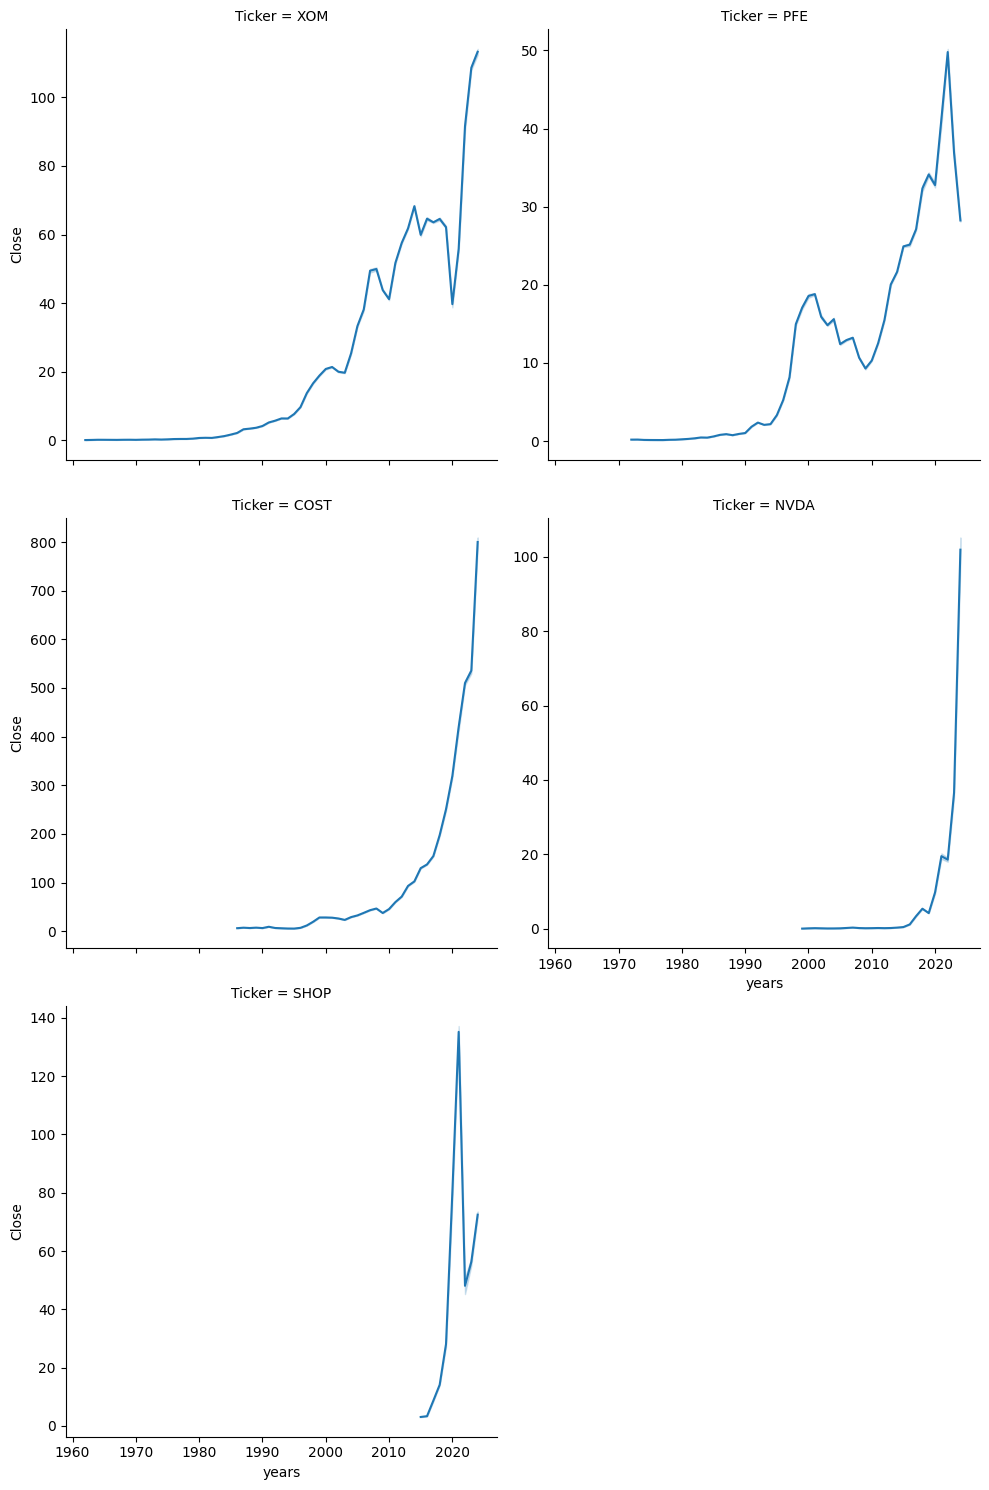

In [ ]:
sns.relplot(data=stocks, x = 'years', y = 'Close', col = 'Ticker', kind = 'line', col_wrap = 2, facet_kws =  {'sharey' : False} )

plt.show()

# Create closing price dataframes for each ticker

In [ ]:
cerb_close = stocks['Close']

In [ ]:

nvidia_df = stocks[stocks['Ticker'] == 'NVDA']

In [ ]:

costco_df = stocks[stocks['Ticker'] == 'COST']

In [ ]:

exxon_df = stocks[stocks['Ticker'] == 'XOM']
pfizer_df = stocks[stocks['Ticker'] == 'PFE']
shopify_df = stocks[stocks['Ticker'] == 'SHOP']

In [ ]:
nvidia_close = nvidia_df['Close']
costco_close = costco_df['Close']
exxon_close = exxon_df['Close']
pfizer_close = pfizer_df['Close']
shopify_close = shopify_df['Close']

#Test for stationarity

In [ ]:
nvidia_close.head()

,Close
Date,
1999-01-22,0.017325
1999-01-25,0.019140
1999-01-26,0.017655
1999-01-27,0.017600
1999-01-28,0.017544


In [ ]:
'''
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(nvidia_close)
test_stationarity(costco_close)
test_stationarity(exxon_close)
test_stationarity(pfizer_close)
test_stationarity(shopify_close)
'''

!pip install pandas matplotlib statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    # Convert the index to a list of strings for plotting
    index_values = timeseries.index.strftime('%Y-%m-%d').tolist()
    plt.plot(index_values, timeseries.values, color='blue',label='Original')
    plt.plot(index_values, rolmean.values, color='red', label='Rolling Mean')
    plt.plot(index_values, rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

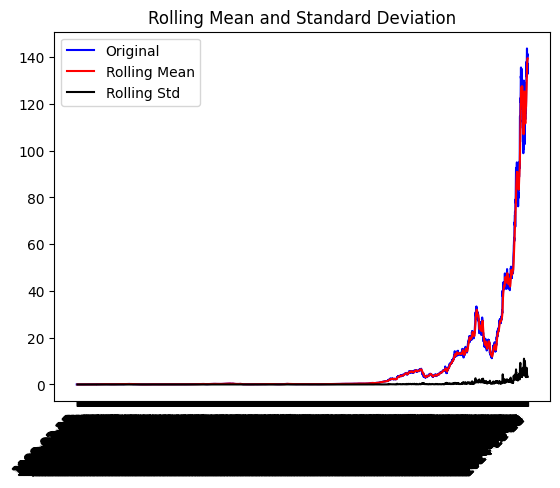

Results of dickey fuller test
Test Statistics                   7.284614
p-value                           1.000000
No. of lags used                 35.000000
Number of observations used    6453.000000
critical value (1%)              -3.431364
critical value (5%)              -2.861988
critical value (10%)             -2.567008
dtype: float64


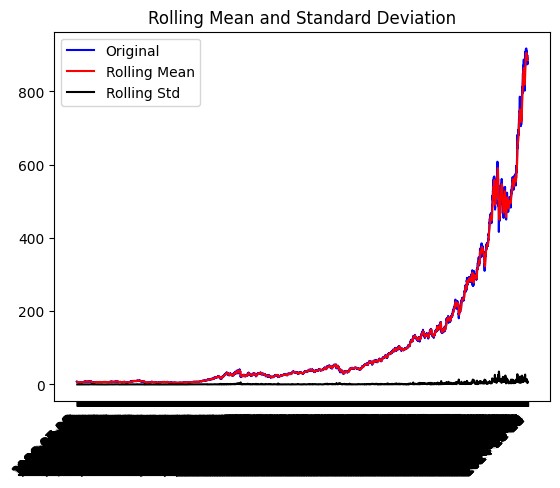

Results of dickey fuller test
Test Statistics                   6.808903
p-value                           1.000000
No. of lags used                 38.000000
Number of observations used    9620.000000
critical value (1%)              -3.431030
critical value (5%)              -2.861840
critical value (10%)             -2.566930
dtype: float64


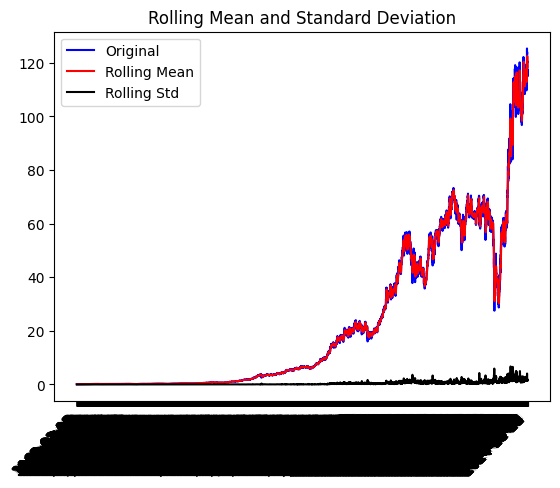

Results of dickey fuller test
Test Statistics                    1.711504
p-value                            0.998156
No. of lags used                  43.000000
Number of observations used    15775.000000
critical value (1%)               -3.430765
critical value (5%)               -2.861723
critical value (10%)              -2.566868
dtype: float64


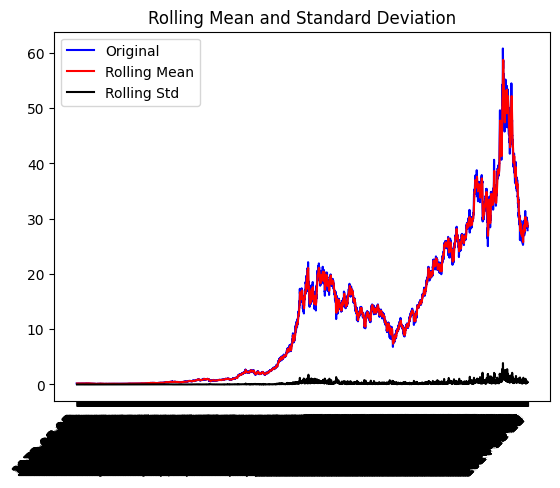

Results of dickey fuller test
Test Statistics                   -0.917659
p-value                            0.782102
No. of lags used                  40.000000
Number of observations used    13179.000000
critical value (1%)               -3.430846
critical value (5%)               -2.861759
critical value (10%)              -2.566887
dtype: float64


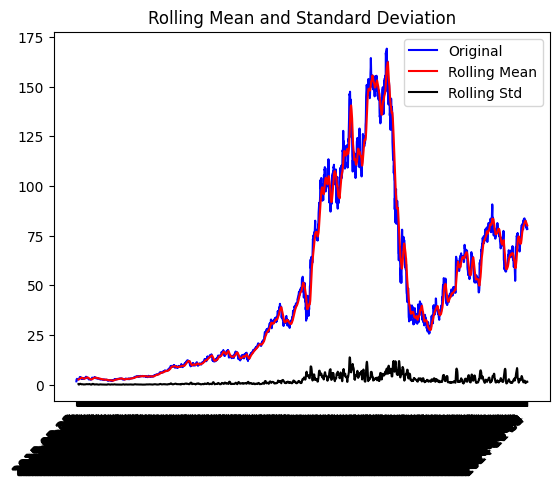

Results of dickey fuller test
Test Statistics                  -1.378914
p-value                           0.592342
No. of lags used                 27.000000
Number of observations used    2354.000000
critical value (1%)              -3.433131
critical value (5%)              -2.862769
critical value (10%)             -2.567424
dtype: float64


In [ ]:
test_stationarity(nvidia_close)
test_stationarity(costco_close)
test_stationarity(exxon_close)
test_stationarity(pfizer_close)
test_stationarity(shopify_close)

#Visualize moving averages

In [ ]:

ma_day = [10, 20, 50]

for ma in ma_day:
    NVDA[f"MA_{ma}"] = NVDA['Close'].rolling(ma).mean()
    COST[f"MA_{ma}"] = COST['Close'].rolling(ma).mean()
    XOM[f"MA_{ma}"] = XOM['Close'].rolling(ma).mean()
    PFE[f"MA_{ma}"] = PFE['Close'].rolling(ma).mean()
    SHOP[f"MA_{ma}"] = SHOP['Close'].rolling(ma).mean()

In [ ]:
NVDA.tail(10)

Price,Ticker,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50
Date,,,,,,,,,,
2024-11-05 00:00:00+00:00,NVDA,137.449997,140.369995,137.330002,139.910004,139.910004,160537400,138.673999,137.831000,125.856400
2024-11-06 00:00:00+00:00,NVDA,142.960007,146.490005,141.960007,145.610001,145.610001,242043900,139.278999,138.479000,126.202600
2024-11-07 00:00:00+00:00,NVDA,146.389999,148.929993,146.169998,148.880005,148.880005,207323300,140.125999,139.182500,126.668000
2024-11-08 00:00:00+00:00,NVDA,148.770004,149.770004,146.259995,147.630005,147.630005,175665800,140.735001,139.824001,127.268800
2024-11-11 00:00:00+00:00,NVDA,148.679993,148.850006,143.570007,145.259995,145.259995,182325600,141.209000,140.183500,127.786600
2024-11-12 00:00:00+00:00,NVDA,146.779999,149.649994,146.009995,148.289993,148.289993,198634700,141.912999,141.017999,128.592400
2024-11-13 00:00:00+00:00,NVDA,149.070007,149.330002,145.899994,146.270004,146.270004,191903300,142.606000,141.545499,129.393600
2024-11-14 00:00:00+00:00,NVDA,147.639999,149.000000,145.550003,146.759995,146.759995,194463300,144.006000,142.037000,130.184600
2024-11-15 00:00:00+00:00,NVDA,144.869995,145.240005,140.080002,141.979996,141.979996,249120000,144.664000,142.235999,130.967600


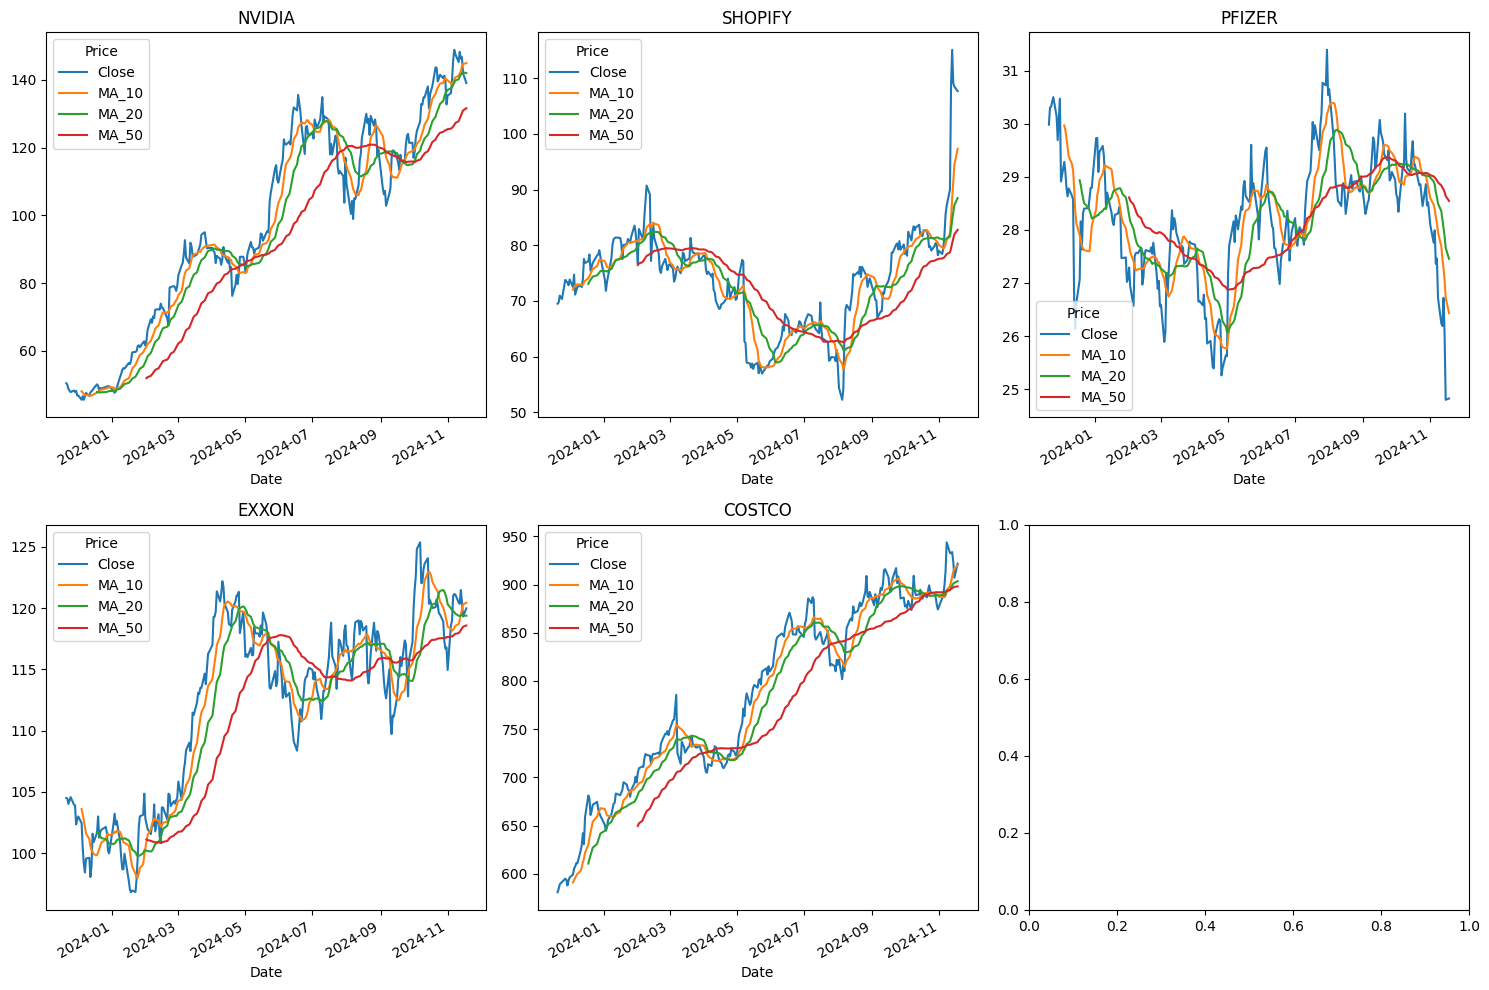

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

NVDA[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=axes[0,0])
axes[0,0].set_title('NVIDIA')

SHOP[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=axes[0,1])
axes[0,1].set_title('SHOPIFY')

XOM[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=axes[1,0])
axes[1,0].set_title('EXXON')

COST[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=axes[1,1])
axes[1,1].set_title('COSTCO')

PFE[['Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=axes[0,2])
axes[0,2].set_title('PFIZER')

fig.tight_layout()

# Eliminate Trend to achieve stationarity

---



In [ ]:

nvidia_log = np.log(nvidia_close)
costco_log = np.log(costco_close)
exxon_log = np.log(exxon_close)
pfizer_log = np.log(pfizer_close)
shopify_log = np.log(shopify_close)

In [ ]:
nvidia_log.dropna(inplace=True)
costco_log.dropna(inplace=True)
exxon_log.dropna(inplace=True)
pfizer_log.dropna(inplace=True)
shopify_log.dropna(inplace=True)

In [ ]:
# Fix indices
nvidia_log.index = nvidia_log.index.to_timestamp()
costco_log.index = costco_log.index.to_timestamp()
exxon_log.index = exxon_log.index.to_timestamp()
pfizer_log.index = pfizer_log.index.to_timestamp()
shopify_log.index = shopify_log.index.to_timestamp()

# NVIDIA

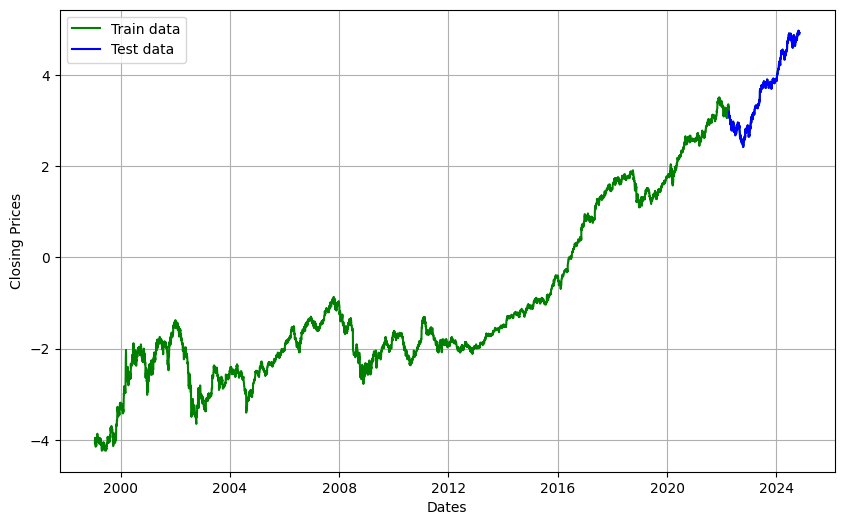

In [ ]:
nvda_train, nvda_test = nvidia_log[3:int(len(nvidia_log)*0.9)], nvidia_log[int(len(nvidia_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(nvidia_log, 'green', label='Train data')
plt.plot(nvda_test, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3558.679, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=3.49 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2520.003, Time=1.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=3.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2518.267, Time=2.96 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1865.202, Time=0.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=9.92 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2521.136, Time=5.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=639.213, Time=5.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2509.937, Time=2.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2512.006, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1501.697, Time=0.

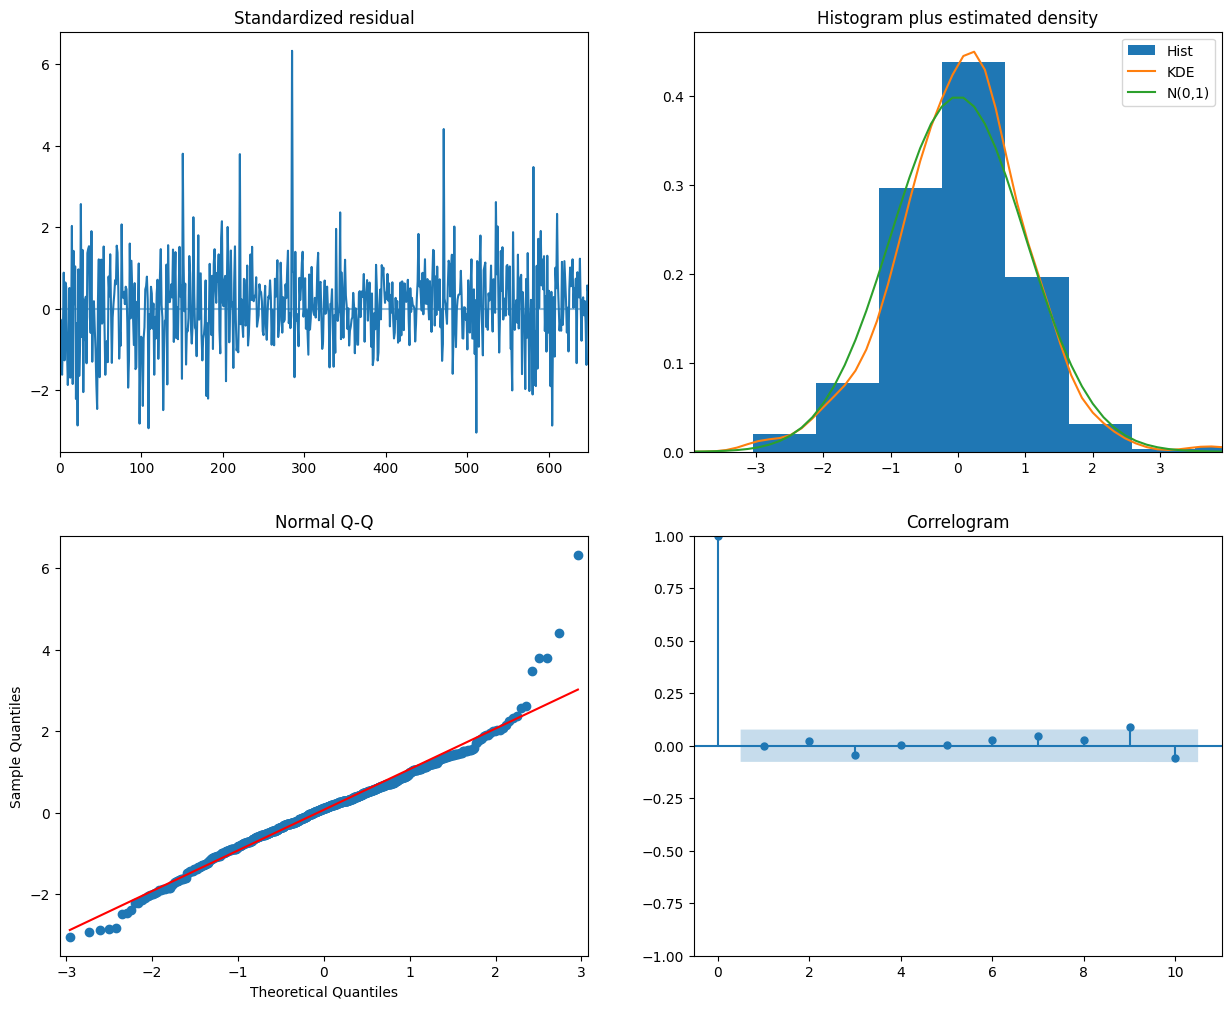

In [ ]:
model_autoARIMA = auto_arima(nvda_test, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())

model_autoARIMA.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
nvda_train.index = pd.DatetimeIndex(nvda_train.index).to_period('D')


In [ ]:

nvda_train.index

PeriodIndex(['1999-01-27', '1999-01-28', '1999-01-29', '1999-02-01',
             '1999-02-02', '1999-02-03', '1999-02-04', '1999-02-05',
             '1999-02-08', '1999-02-09',
             ...
             '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
             '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
             '2022-04-04', '2022-04-05'],
            dtype='period[D]', name='Date', length=5837)

In [ ]:
nvda_test.index = pd.DatetimeIndex(nvda_test.index).to_period('D')

In [ ]:

nvda_test.index

PeriodIndex(['2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
             '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-18',
             '2022-04-19', '2022-04-20',
             ...
             '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
             '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
             '2024-11-01', '2024-11-04'],
            dtype='period[D]', name='Date', length=649)

In [ ]:
model = ARIMA(nvda_train, order=(1,0,1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5837
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10786.265
Date:                Mon, 18 Nov 2024   AIC                         -21564.530
Time:                        17:56:09   BIC                         -21537.842
Sample:                    01-27-1999   HQIC                        -21555.249
                         - 04-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9765      3.267     -0.299      0.765      -7.380       5.427
ar.L1          0.9999      0.000   3881.758      0.000       0.999       1.000
ma.L1          0.0026      0.008      0.324      0.7

In [ ]:
fc = fitted.get_forecast(steps = '2024-11-04' )
summary = fc.summary_frame()
print(summary)




Close           mean   mean_se  mean_ci_lower  mean_ci_upper
2015-01-20  3.255019  0.038092       3.180359       3.329678
2015-01-21  3.254739  0.053940       3.149019       3.360459
2015-01-22  3.254459  0.066089       3.124927       3.383991
2015-01-23  3.254179  0.076327       3.104580       3.403778
2015-01-24  3.253899  0.085345       3.086626       3.421172
...              ...       ...            ...            ...
2024-10-31  2.364704  2.038047      -1.629795       6.359203
2024-11-01  2.364483  2.038270      -1.630453       6.359420
2024-11-02  2.364262  2.038493      -1.631111       6.359636
2024-11-03  2.364041  2.038716      -1.631769       6.359852
2024-11-04  2.363820  2.038939      -1.632427       6.360068

[3577 rows x 4 columns]


In [ ]:
se = fc.se_mean
conf_int = fc.conf_int(alpha=0.05)

In [ ]:
# Make as pandas series
fc_series = pd.Series(summary['mean'], index=nvda_test.index)
fc_series.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 649 entries, 2022-04-06 to 2024-11-04
Freq: D
Series name: mean
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


In [ ]:
conf_int.tail()

,lower Close,upper Close
2024-10-31,-1.629795,6.359203
2024-11-01,-1.630453,6.359420
2024-11-02,-1.631111,6.359636
2024-11-03,-1.631769,6.359852
2024-11-04,-1.632427,6.360068


In [ ]:
lower_series = pd.Series(conf_int['lower Close'], index=nvda_test.index)
upper_series = pd.Series(conf_int['upper Close'], index=nvda_test.index)

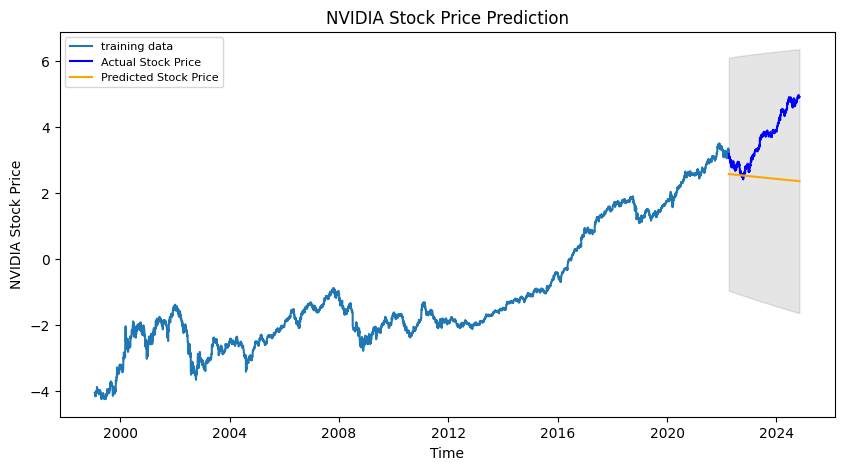

In [ ]:
nvda_test.index = nvda_test.index.to_timestamp()
nvda_train.index = nvda_train.index.to_timestamp()
fc_series.index = fc_series.index.to_timestamp()
lower_series.index = lower_series.index.to_timestamp()
upper_series.index = upper_series.index.to_timestamp()
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(nvda_train, label='training data')
plt.plot(nvda_test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('NVIDIA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVIDIA Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(nvda_test, fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(nvda_test, fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(nvda_test, fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_series - nvda_test)/np.abs(nvda_test))
print('MAPE: '+str(mape))

MSE: 2.1200216946601973
MAE: 1.2009889726488847
RMSE: 1.4560294278139427
MAPE: 0.29343738929062524


# Costco

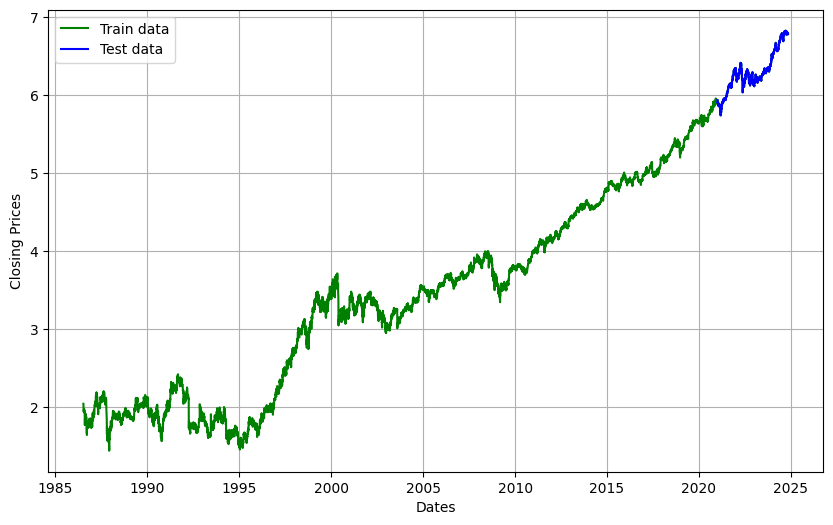

In [ ]:
cost_train, cost_test = costco_log[3:int(len(costco_log)*0.9)], costco_log[int(len(costco_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(costco_log, 'green', label='Train data')
plt.plot(cost_test, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5431.657, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5429.733, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5429.736, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5430.138, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5427.806, Time=1.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.963 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  966
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2717.829
Date:                Mon, 18 Nov 2024   AIC                          -5431.657
Time:                        18:34:57   BIC                          -5421.913
Sample:                             0   HQIC                         -5427.947
                                - 966                                  

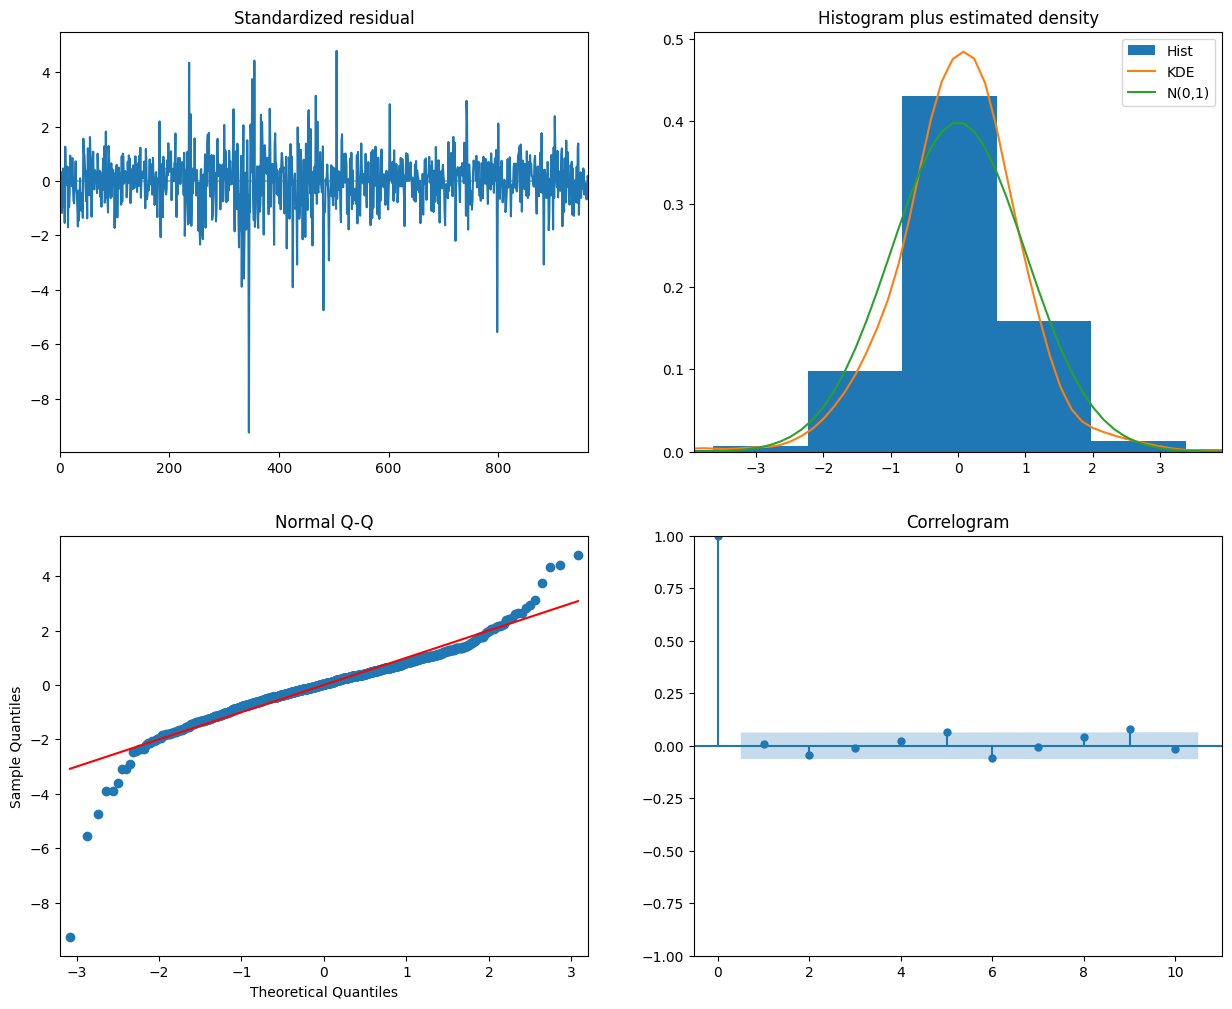

In [ ]:
model_autoARIMA_cost = auto_arima(cost_test, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA_cost.summary())

model_autoARIMA_cost.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
cost_train.index = pd.DatetimeIndex(cost_train.index).to_period('D')


In [ ]:

cost_train.index

PeriodIndex(['1986-07-14', '1986-07-15', '1986-07-16', '1986-07-17',
             '1986-07-18', '1986-07-21', '1986-07-22', '1986-07-23',
             '1986-07-24', '1986-07-25',
             ...
             '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
             '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
             '2020-12-30', '2020-12-31'],
            dtype='period[D]', name='Date', length=8690)

In [ ]:
cost_test.index = pd.DatetimeIndex(cost_test.index).to_period('D')

In [ ]:

cost_test.index

PeriodIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
             '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
             '2021-01-14', '2021-01-15',
             ...
             '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
             '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
             '2024-11-01', '2024-11-04'],
            dtype='period[D]', name='Date', length=966)

In [ ]:
model_cost = ARIMA(cost_train, order=(0,1,0))
fitted_cost = model.fit()
print(fitted_cost.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8690
Model:                 ARIMA(0, 1, 0)   Log Likelihood               21541.102
Date:                Mon, 18 Nov 2024   AIC                         -43080.203
Time:                        18:34:59   BIC                         -43073.133
Sample:                    07-14-1986   HQIC                        -43077.793
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   2.37e-06    173.884      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             52007.53
Prob(Q):                              0.61   Pr

In [ ]:
fc_cost = fitted_cost.get_forecast(steps = '2024-11-04' )
summary_cost = fc_cost.summary_frame()
print(summary)




Close           mean   mean_se  mean_ci_lower  mean_ci_upper
2015-01-20  3.255019  0.038092       3.180359       3.329678
2015-01-21  3.254739  0.053940       3.149019       3.360459
2015-01-22  3.254459  0.066089       3.124927       3.383991
2015-01-23  3.254179  0.076327       3.104580       3.403778
2015-01-24  3.253899  0.085345       3.086626       3.421172
...              ...       ...            ...            ...
2024-10-31  2.364704  2.038047      -1.629795       6.359203
2024-11-01  2.364483  2.038270      -1.630453       6.359420
2024-11-02  2.364262  2.038493      -1.631111       6.359636
2024-11-03  2.364041  2.038716      -1.631769       6.359852
2024-11-04  2.363820  2.038939      -1.632427       6.360068

[3577 rows x 4 columns]


In [ ]:
se_cost = fc_cost.se_mean
conf_int_cost = fc_cost.conf_int(alpha=0.05)

In [ ]:
# Make as pandas series
fc_series_cost = pd.Series(summary_cost['mean'], index=cost_test.index)
fc_series_cost.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 966 entries, 2021-01-04 to 2024-11-04
Freq: D
Series name: mean
Non-Null Count  Dtype  
--------------  -----  
966 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB


In [ ]:
lower_series_cost = pd.Series(conf_int_cost['lower Close'], index=cost_test.index)
upper_series_cost = pd.Series(conf_int_cost['upper Close'], index=cost_test.index)

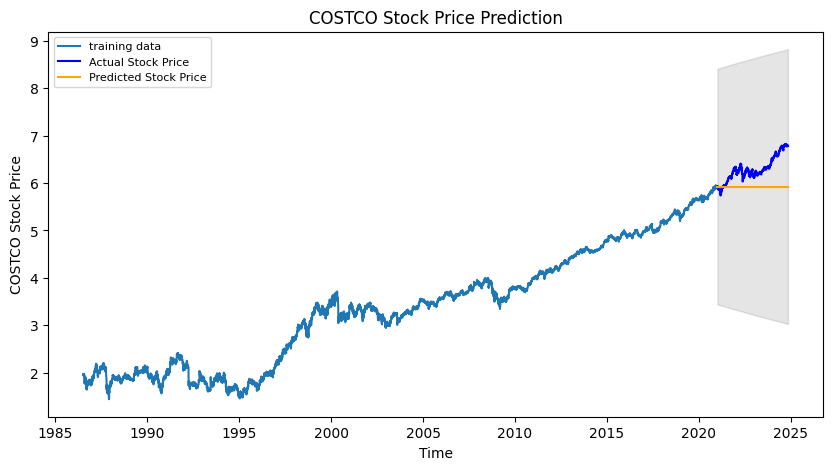

In [ ]:
cost_test.index = cost_test.index.to_timestamp()
cost_train.index = cost_train.index.to_timestamp()
fc_series_cost.index = fc_series_cost.index.to_timestamp()
lower_series_cost.index = lower_series_cost.index.to_timestamp()
upper_series_cost.index = upper_series_cost.index.to_timestamp()
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(cost_train, label='training data')
plt.plot(cost_test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series_cost, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series_cost.index, lower_series_cost, upper_series_cost,
                 color='k', alpha=.10)
plt.title('COSTCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COSTCO Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(cost_test, fc_series_cost)
print('MSE: '+str(mse))
mae = mean_absolute_error(cost_test, fc_series_cost)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(cost_test, fc_series_cost))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_series_cost - cost_test)/np.abs(cost_test))
print('MAPE: '+str(mape))

MSE: 0.19680684828323766
MAE: 0.3751740873677573
RMSE: 0.4436291788005357
MAPE: 0.05827417773594893
